In [2]:
import pandas as pd
import numpy as np

In [3]:
df1=pd.read_csv(r"E:\IIT project\bank+marketing\bank\bank-full.csv", sep=';')
df= pd.DataFrame(df1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
print(df.shape)

(45211, 17)


In [5]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
df[df['balance']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


pdays     previous    0.454820
day       campaign    0.162490
age       balance     0.097783
balance   duration    0.021560
          previous    0.016674
age       campaign    0.004760
balance   day         0.004503
          pdays       0.003435
age       previous    0.001288
duration  previous    0.001203
          pdays      -0.001565
age       duration   -0.004648
          day        -0.009120
balance   campaign   -0.014578
age       pdays      -0.023758
day       duration   -0.030206
campaign  previous   -0.032855
day       previous   -0.051710
duration  campaign   -0.084570
campaign  pdays      -0.088628
day       pdays      -0.093044
dtype: float64


<ipython-input-7-697831e6dffe>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  .astype(np.bool)).stack().sort_values(ascending=False))


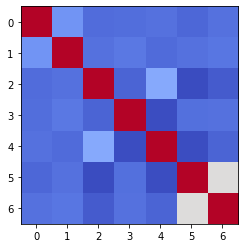

In [7]:
from matplotlib import pyplot as plt  # Plotting library

abs_corr_features = df.corr()  # Calculate correlation matrix
plt.imshow(abs_corr_features, cmap='coolwarm', interpolation='none')
rearrange = (abs_corr_features.where(np.triu(np.ones(abs_corr_features.shape), k=1)
                                     .astype(np.bool)).stack().sort_values(ascending=False))

print(rearrange)


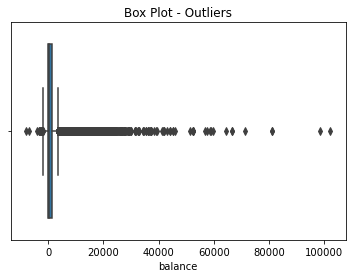

In [8]:
#outlier detection 
import seaborn as sns
from matplotlib import pyplot as plt

sns.boxplot(x=df['balance'])

# Set the plot title and labels
plt.title("Box Plot - Outliers")
plt.xlabel('balance')

# Show the plot
plt.show()


<AxesSubplot:>

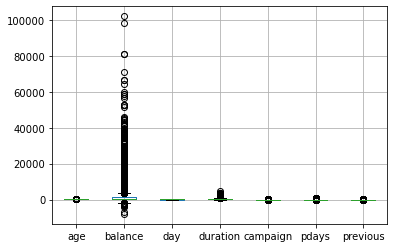

In [9]:
df.boxplot()

<AxesSubplot:>

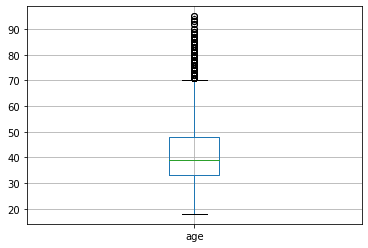

In [10]:
pd.DataFrame(df['age']).boxplot()

<AxesSubplot:xlabel='balance', ylabel='Count'>

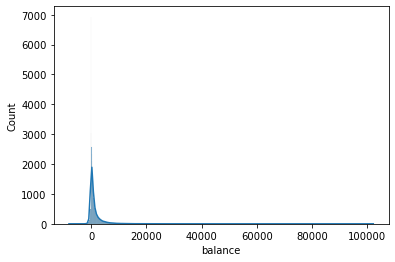

In [11]:
sns.histplot(df['balance'], kde=True)

In [12]:
i=0

for column in df.columns:
    if df[column].dtypes!='object':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        lenghthU=len(df[column][df[column]> upper])
        lenghthL=len(df[column][df[column]< lower])
        print(f"Total outlier in {column} for upperbound is {lenghthU} and for lowebound is {lenghthL}")
        df[column] = np.where(df[column] >upper ,upper,df[column] )
        df[column] = np.where(df[column] <lower ,lower,df[column])

Total outlier in age for upperbound is 487 and for lowebound is 0
Total outlier in balance for upperbound is 4712 and for lowebound is 17
Total outlier in day for upperbound is 0 and for lowebound is 0
Total outlier in duration for upperbound is 3235 and for lowebound is 0
Total outlier in campaign for upperbound is 3064 and for lowebound is 0
Total outlier in pdays for upperbound is 8257 and for lowebound is 0
Total outlier in previous for upperbound is 8257 and for lowebound is 0


<AxesSubplot:>

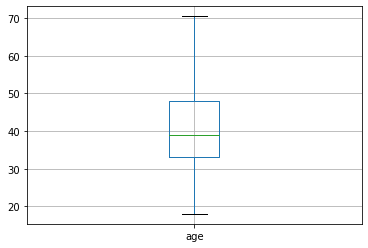

In [13]:
df[['age']].boxplot()

In [14]:
from sklearn.preprocessing import MinMaxScaler
# Get the numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df.drop('y', axis=1)
y = df['y']

# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit the StandardScaler object to the numeric columns
scaler.fit(df[numeric_columns])

# Transform the numeric columns using the StandardScaler object
df[numeric_columns] = scaler.transform(df[numeric_columns])
print(df)

            age           job   marital  education default   balance housing  \
0      0.761905    management   married   tertiary      no  0.756822     yes   
1      0.495238    technician    single  secondary      no  0.367072     yes   
2      0.285714  entrepreneur   married  secondary      no  0.362094     yes   
3      0.552381   blue-collar   married    unknown      no  0.639381     yes   
4      0.285714       unknown    single    unknown      no  0.361910      no   
...         ...           ...       ...        ...     ...       ...     ...   
45206  0.628571    technician   married   tertiary      no  0.513827      no   
45207  1.000000       retired  divorced    primary      no  0.680494      no   
45208  1.000000       retired   married  secondary      no  1.000000      no   
45209  0.742857   blue-collar   married  secondary      no  0.484882      no   
45210  0.361905  entrepreneur   married  secondary      no  0.909476      no   

      loan    contact       day month  

In [15]:
print(df.describe())


                age       balance           day      duration      campaign  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.435584      0.533869      0.493547      0.365380      0.278446   
std        0.197998      0.216955      0.277416      0.274883      0.320022   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.285714      0.375000      0.233333      0.160187      0.000000   
50%        0.400000      0.444322      0.500000      0.279938      0.200000   
75%        0.571429      0.625000      0.666667      0.496112      0.400000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         pdays  previous  
count  45211.0   45211.0  
mean       0.0       0.0  
std        0.0       0.0  
min        0.0       0.0  
25%        0.0       0.0  
50%        0.0       0.0  
75%        0.0       0.0  
max        0.0       0.0  


In [16]:
print(df.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


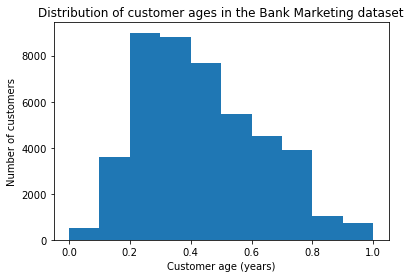

In [17]:

# Get the customer ages
customer_ages = df['age']

# Create a histogram of the customer ages
plt.hist(customer_ages)
plt.xlabel('Customer age (years)')
plt.ylabel('Number of customers')
plt.title('Distribution of customer ages in the Bank Marketing dataset')
plt.show()

In [18]:
df.corr()
df['y']=df["y"].astype(str)

In [19]:
# differentiating categorical and numerical values
#categorical values
df_categorical = df.select_dtypes(exclude=['number', 'bool_', 'float_'])
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [20]:
df_numerical = df.select_dtypes(exclude=['object'])
df_numerical.head()

,age,balance,day,duration,campaign,pdays,previous
0,0.761905,0.756822,0.133333,0.405910,0.0,0.0,0.0
1,0.495238,0.367072,0.133333,0.234837,0.0,0.0,0.0
2,0.285714,0.362094,0.133333,0.118196,0.0,0.0,0.0
3,0.552381,0.639381,0.133333,0.143079,0.0,0.0,0.0
4,0.285714,0.361910,0.133333,0.307932,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

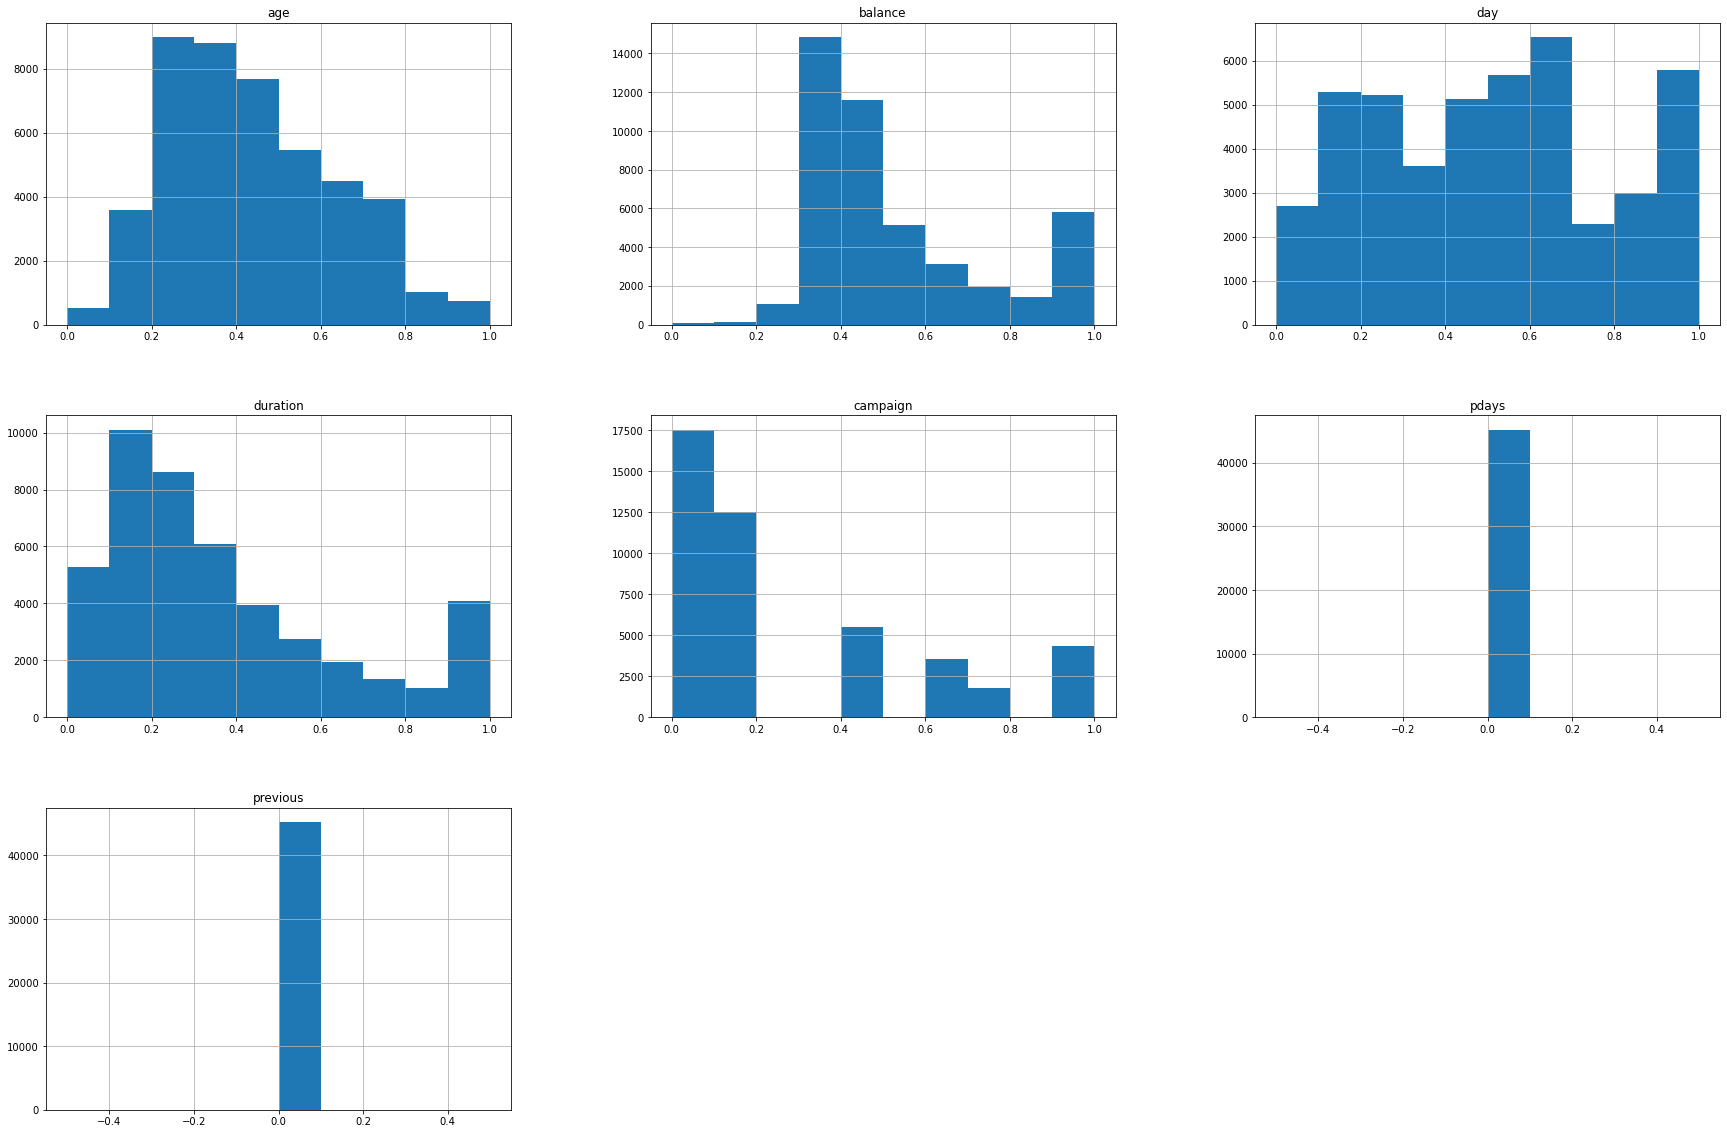

In [21]:
df.hist(figsize=(30, 20))

#### label encoding to convert categorical data into numeric data 

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

print(df.dtypes)

age          float64
job            int32
marital        int32
education      int32
default        int32
balance      float64
housing        int32
loan           int32
contact        int32
day          float64
month          int32
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome       int32
y             object
dtype: object


In [23]:
y = df['y']
print(y.size)

45211


In [24]:
y = y.replace({'yes': 1, 'no': 0})
y = y.to_numpy()

In [25]:
X = df.loc[:, df.columns != 'y']
X.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.761905,4,1,2,0,0.756822,1,0,2,0.133333,8,0.405910,0.0,0.0,0.0,3
1,0.495238,9,2,1,0,0.367072,1,0,2,0.133333,8,0.234837,0.0,0.0,0.0,3
2,0.285714,2,1,1,0,0.362094,1,1,2,0.133333,8,0.118196,0.0,0.0,0.0,3
3,0.552381,1,1,3,0,0.639381,1,0,2,0.133333,8,0.143079,0.0,0.0,0.0,3
4,0.285714,11,2,3,0,0.361910,0,0,2,0.133333,8,0.307932,0.0,0.0,0.0,3


In [26]:
print(X.shape)


(45211, 16)


In [27]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.761905,4,1,2,0,0.756822,1,0,2,0.133333,8,0.405910,0.0,0.0,0.0,3,no
1,0.495238,9,2,1,0,0.367072,1,0,2,0.133333,8,0.234837,0.0,0.0,0.0,3,no
2,0.285714,2,1,1,0,0.362094,1,1,2,0.133333,8,0.118196,0.0,0.0,0.0,3,no
3,0.552381,1,1,3,0,0.639381,1,0,2,0.133333,8,0.143079,0.0,0.0,0.0,3,no
4,0.285714,11,2,3,0,0.361910,0,0,2,0.133333,8,0.307932,0.0,0.0,0.0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.628571,9,1,2,0,0.513827,0,0,0,0.533333,9,1.000000,0.4,0.0,0.0,3,yes
45207,1.000000,5,0,0,0,0.680494,0,0,0,0.533333,9,0.709176,0.2,0.0,0.0,3,yes
45208,1.000000,5,1,1,0,1.000000,0,0,0,0.533333,9,1.000000,0.8,0.0,0.0,2,yes
45209,0.742857,1,1,1,0,0.484882,0,0,1,0.533333,9,0.790047,0.6,0.0,0.0,3,no


In [28]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(df.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(45211, 17) (33908, 16) (11303, 16) (33908,) (11303,)


In [29]:
df.describe()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.0,45211.0,45211.000000
mean,0.435584,4.339762,1.167725,1.224813,0.018027,0.533869,0.555838,0.160226,0.640242,0.493547,5.523014,0.365380,0.278446,0.0,0.0,2.559974
std,0.197998,3.272657,0.608230,0.747997,0.133049,0.216955,0.496878,0.366820,0.897951,0.277416,3.006911,0.274883,0.320022,0.0,0.0,0.989059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.285714,1.000000,1.000000,1.000000,0.000000,0.375000,0.000000,0.000000,0.000000,0.233333,3.000000,0.160187,0.000000,0.0,0.0,3.000000
50%,0.400000,4.000000,1.000000,1.000000,0.000000,0.444322,1.000000,0.000000,0.000000,0.500000,6.000000,0.279938,0.200000,0.0,0.0,3.000000
75%,0.571429,7.000000,2.000000,2.000000,0.000000,0.625000,1.000000,0.000000,2.000000,0.666667,8.000000,0.496112,0.400000,0.0,0.0,3.000000
max,1.000000,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,11.000000,1.000000,1.000000,0.0,0.0,3.000000


In [30]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test) #to normalize


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9021498717154738


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9978
           1       0.67      0.33      0.44      1325

    accuracy                           0.90     11303
   macro avg       0.79      0.65      0.69     11303
weighted avg       0.89      0.90      0.89     11303



Answers to the questions
***1. What is the distribution of the customer ages?***

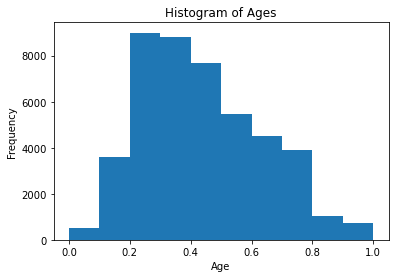

In [33]:
ages = df['age']
plt.hist(ages)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')
plt.show()

***2. What is the relationship between customer age and subscription?***

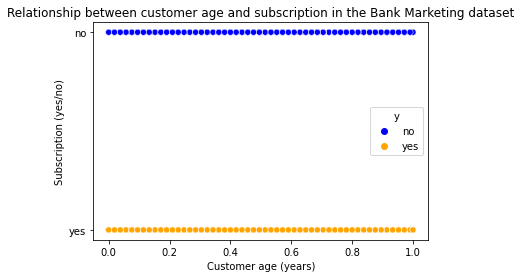

In [34]:
sns.scatterplot(
    x='age',
    y='y',
    hue='y',
    data=df,
    palette=['blue', 'orange'],
)

# Add labels and title
plt.xlabel('Customer age (years)')
plt.ylabel('Subscription (yes/no)')
plt.title('Relationship between customer age and subscription in the Bank Marketing dataset')

# Show the plot
plt.show()

##### 3. Are there any other factors that are correlated with subscription?

Yes, there are a number of other factors that are correlated with subscription, including:

Income: Customers with higher incomes are more likely to subscribe to services. This is because they can afford to spend more money on subscriptions.
Education: Customers with higher levels of education are more likely to subscribe to services. This is because they are more likely to be aware of the benefits of subscription services and to be able to afford them.
Technology use: Customers who use technology more frequently are more likely to subscribe to services. This is because they are more comfortable using technology and more likely to be interested in new products and services.
Value of convenience and flexibility: Customers who value convenience and flexibility are more likely to subscribe to services. This is because subscription services offer a convenient and flexible way to access products and services.
Brand loyalty: Customers who are loyal to certain brands are more likely to subscribe to their services. This is because they trust the brand and are more likely to be satisfied with their products and services.
Businesses can use this information to develop marketing strategies that target customers with the following characteristics:

High income
High level of education
Frequent use of technology
Value convenience and flexibility
Brand loyalty
For example, businesses can offer discounts to customers who subscribe to multiple services, or they can create subscription plans that are flexible and easy to cancel.

It is important to note that the correlation between these factors and subscription can vary depending on the specific product or service. For example, customers of all ages may be likely to subscribe to a streaming service like Netflix, but older customers may be more likely to subscribe to a traditional cable TV service.

Businesses can conduct market research to identify the factors that are most correlated with subscription for their specific product or service. This information can then be used to develop marketing strategies that target the right customers.


##### 4. What is the accuracy of the logistic regression model?

In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
clf = LogisticRegression()
to_drop=['y','age','previous','campaign','day']
X = df.drop(to_drop, axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
clf = LogisticRegression(max_iter=100000)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = clf.predict(X_test)

unique_labels = set(y_test)
print(unique_labels)

precision = precision_score(y_test, y_pred,pos_label='yes')
recall = recall_score(y_test, y_pred,pos_label='yes')
print('Training accuracy:',clf.score(X_train,y_train))                            # print training accuracy
print('Testing  accuracy:',clf.score(X_test,y_test))
print("Precision:", precision)
print("Recall:", recall)

{'yes', 'no'}
Training accuracy: 0.888216102632161
Testing  accuracy: 0.8811235209554351
Precision: 0.5168067226890757
Recall: 0.22548120989917506


##### 5. What are the most important features for the logistic regression model?

The most important features for a logistic regression model are the features that are most predictive of the target variable. This can be determined by using a variety of methods, such as:

Correlation analysis: This involves calculating the correlation between each feature and the target variable. Features with higher correlations are more likely to be predictive of the target variable.
Recursive feature elimination: This involves training a logistic regression model on all of the features and then removing the feature that is least predictive of the target variable. The process is then repeated until a subset of the most predictive features remains.
L1 regularization: This is a regularization technique that penalizes the coefficients of the features. This can help to identify the most important features by shrinking the coefficients of the less important features towards zero.
Once the most important features have been identified, they can be used to train a logistic regression model. This model can then be used to predict the target variable for new data points.

Here are some examples of features that are commonly used in logistic regression models:

Demographic features: Age, gender, income, education level, location, etc.
Behavioral features: Past purchase history, website browsing behavior, social media activity, etc.
Attitudinal features: Customer satisfaction, brand loyalty, etc.
The specific features that are most important for a logistic regression model will depend on the specific problem that is being solved. For example, a logistic regression model that is used to predict whether or not a customer will subscribe to a service may use different features than a logistic regression model that is used to predict whether or not a customer will churn.

It is important to note that logistic regression models are only as good as the data that they are trained on. If the data is noisy or incomplete, the model will not be able to learn the relationships between the features and the target variable accurately.

Here are some tips for selecting the most important features for a logistic regression model:

Use a variety of feature selection methods. There is no single best method for selecting features. It is a good idea to use a variety of methods to get a more complete picture of which features are most important.
Consider the specific problem that you are trying to solve. Which features are most likely to be predictive of the target variable?
Use domain knowledge. If you have expertise in the problem domain, you can use your knowledge to select the features that are most likely to be important.
By following these tips, you can select the most important features for your logistic regression model and improve the accuracy of your predictions.





#### 6. . What is the precision of the logistic regression model?


    =0.51

#### 7. What is the recall of the logistic regression model?

    =22.54
  

***8. What is the f1-score of the logistic regression model?***

In [38]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = LogisticRegression()
to_drop=['y','age','previous','campaign','day']
X = df.drop(to_drop, axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
clf = LogisticRegression(max_iter=100000)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, pos_label='no')

precision = precision_score(y_test, y_pred,pos_label='yes')
recall = recall_score(y_test, y_pred,pos_label='yes')
print('Training accuracy:',clf.score(X_train,y_train))                            # print training accuracy
print('Testing  accuracy:',clf.score(X_test,y_test))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Training accuracy: 0.888216102632161
Testing  accuracy: 0.8811235209554351
Precision: 0.5168067226890757
Recall: 0.22548120989917506
F1 Score: 0.9349234215146196


#### 9. How can you improve the performance of the logistic regression model?


 By dropping useless columns and removing outliers

#### 10. What are the limitations of the logistic regression model?

Logistic regression is a powerful machine learning algorithm, but it has a number of limitations, including:

Linearity: Logistic regression assumes that the relationship between the independent variables and the dependent variable is linear. This is not always the case in real-world data, and can lead to inaccurate predictions.
Overfitting: Logistic regression is prone to overfitting, which occurs when the model learns the training data too well and is unable to generalize to new data. This can be mitigated by using regularization techniques, such as L1 or L2 regularization.
Class imbalance: Logistic regression can perform poorly when the target variable is imbalanced, meaning that there are significantly more observations in one class than in the other class. This can be addressed by using techniques such as oversampling the minority class or undersampling the majority class.
Non-monotonic relationships: Logistic regression cannot model non-monotonic relationships between the independent variables and the dependent variable. This means that it cannot predict the outcome when the relationship between the variables is complex.
In addition to these limitations, logistic regression is also a relatively simple model. It may not be able to capture complex relationships between the variables in some cases.

Despite these limitations, logistic regression is a widely used machine learning algorithm that can be effective for a variety of tasks. It is relatively simple to understand and implement, and it can be used with relatively small datasets.

Here are some tips for overcoming the limitations of logistic regression:

Check for linearity: Before using logistic regression, it is important to check whether the relationship between the independent variables and the dependent variable is linear. This can be done by plotting the data or using statistical tests. If the relationship is not linear, you may need to use a different machine learning algorithm, such as a support vector machine or a decision tree.
Use regularization: Regularization techniques can help to prevent overfitting. L1 regularization shrinks the coefficients of the independent variables, while L2 regularization shrinks them towards zero. You can experiment with different values of the regularization parameter to find the value that works best for your data.
Address class imbalance: If the target variable is imbalanced, you can address this by using techniques such as oversampling the minority class or undersampling the majority class. There are a number of different techniques available, so you can experiment to find the one that works best for your data.
Use a more complex model: If the relationship between the independent variables and the dependent variable is complex and non-monotonic, you may need to use a more complex machine learning algorithm, such as a support vector machine or a neural network.
Overall, logistic regression is a powerful machine learning algorithm that can be used for a variety of tasks. However, it is important to be aware of its limitations and to take steps to overcome them.
